# Final Comparison

Here, we make a final comparison of all test accuracies from the previous classifiers and discuss the results. Let's begin to retrieve the test accuracy of each model that we stored with the %store magic.

In [1]:
import pandas as pd
import numpy as np
# Retrieve the stored variables
%store

Stored variables and their in-db values:
cnn_test_score                    ->   model  test_accuracy
0   cnn           0.36
dt_test_score                     ->                     model  test_accuracy
0  desici
knn_test_score                    ->   model  test_accuracy
0  k-NN           0.92
logistic_test_score               ->       model  test_accuracy
0  logistic           0
one_layer_test_score              ->         model  test_accuracy
0  1-layer nn        
rf_test_score                     ->            model  test_accuracy
0  random forest  
svm_linear_test_score             ->         model  test_accuracy
0  svm linear        
svm_rbf_test_score                ->      model  test_accuracy
0  svm rbf           0.9
two_layer_test_score              ->         model  test_accuracy
0  2-layer nn        


In [2]:
# Extract the stored results and combine them into a DataFrame
%store -r
results = pd.concat([
    knn_test_score,
    dt_test_score,
    logistic_test_score,
    rf_test_score,
    svm_linear_test_score,
    svm_rbf_test_score,
    one_layer_test_score,
    two_layer_test_score,
    cnn_test_score
          ]).reset_index(drop=True)
results

,model,test_accuracy
0,k-NN,0.92
1,desicion tree with pca,0.84
2,logistic,0.94
3,random forest,0.92
4,svm linear,0.92
5,svm rbf,0.92
6,1-layer nn,0.94
7,2-layer nn,0.94
8,cnn,0.36


Here are our results. except my own cnn model and the decision tree with pca, all other models are quite similar. Let's visualize those data.

In [3]:
# Create function to show value 
## this function has been taken from this website : https://www.statology.org/seaborn-barplot-show-values/

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.2f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.3f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
    

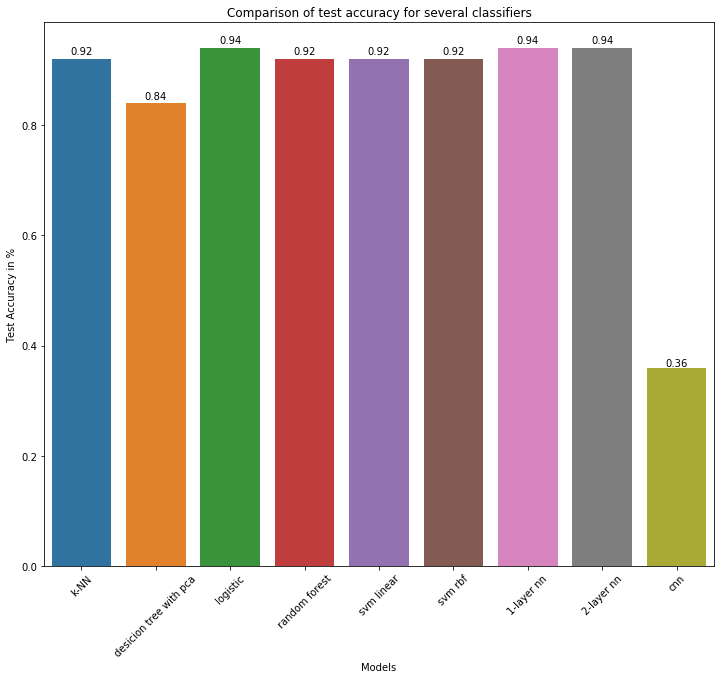

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Barplot
fig, ax = plt.subplots(figsize = (12,10))
p = sns.barplot(x = results.model, y = results.test_accuracy, ax=ax)
show_values(p)
plt.title("Comparison of test accuracy for several classifiers")
plt.xlabel("Models")
plt.ylabel("Test Accuracy in %")
plt.xticks(rotation=45);

# Conclusion
After this long journey, three models stand out. __Logistic regression__, __1-layer neural network__ and __2-layer neural network__ with __94%__ accuracy (note, these results might change due to randomness but all lie between 92 and 94%). Several others followed closely with __92%__ accuracy. The __decision tree__ performed more poorly with only __"84%"__, although the result improved with the addition of the PCA as preprocessor for the data. Finally, my own __convolutional network__ is the lowest with __36%__ accuracy. We can therefore draw the conclusions of the importance of using pretrained models. Indeed, this allows to be quite accurate, even with a small dataset. My poor performance with the cnn is mainly due to the lack of data for the model to learn properly. Otherwise, the other models are quite similar. Again, it is difficult to predict in advance which model will be the best. It all depends on our data, our hyperparameters etc. This is why it is very important to always try several models in order to get the best possible result.